# Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Steps performed for the analysis:
* Importing the required libraries and the dataset
* Inspecting the DataFrame
* Checking for missing values
* Analyzing coloumns individually and handling missing values
* Univariate Analysis and outlier treatment
* Dropping redundant columns
* Converting some binary variables (Yes/No) to 0/1
* Grouping coloumn features
* Dummy creation
* Train - Test Split
* Feature Scaling
* Model Building
* Feature Selection Using RFE
* Plotting the ROC Curve
* Finding Optimal Cut-Off Points
* Precision and Recall
* Making Predictions on the Test Set

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Understanding the data

In [2]:
## Reading the data 
leads = pd.read_csv("Leads.csv")

In [3]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
### checking data type of individual columns
leads.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Null Values Check

In [9]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

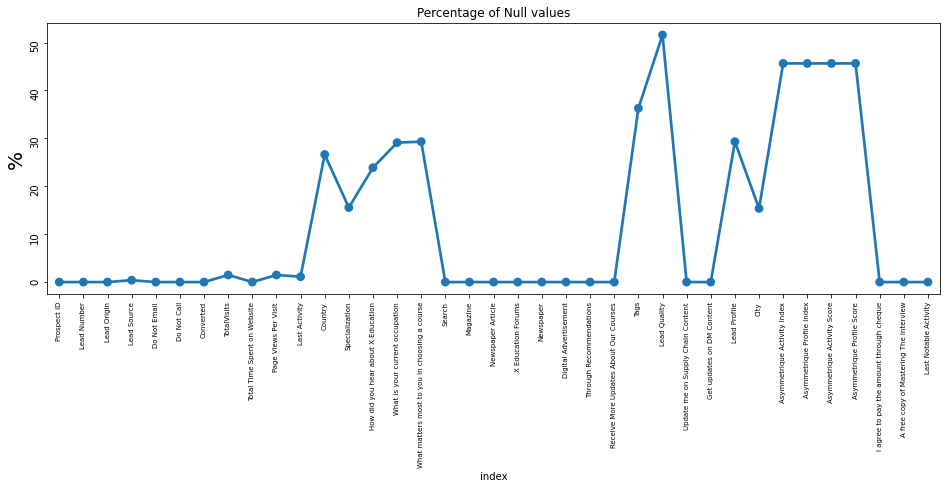

In [10]:
# calculating the percentage of null values
null_values = pd.DataFrame( (leads.isnull().sum()) * 100 / leads.shape[0]).reset_index()

plt.figure(figsize = (16,5))

ax = sns.pointplot('index', 0, data = null_values)

plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(rotation = 90, fontsize = 10)

plt.title("Percentage of Null values")

plt.ylabel("%" , fontsize = 20)

plt.show()

In [11]:
len(leads.columns[leads.isnull().any()])

17

In [12]:
### Check for columns >40% null values and drop them
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
drop_columns = set(['Lead Quality' ,
'Asymmetrique Activity Index' ,
'Asymmetrique Profile Index' ,
'Asymmetrique Activity Score' ,
'Asymmetrique Profile Score' ]) # set of "good" columns we want to keep
columns = list(leads.columns.values)
for col in columns:
    if col  in drop_columns:
        leads = leads.drop(col, 1)  

In [14]:
leads.shape

(9240, 32)

In [15]:
## now check for remaining columns with nukll values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [16]:
## replace XNA with NaN
leads.replace("XNA", np.nan,inplace=True)

#### Now let's treat each column with missing values

In [17]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

##### Since India is the most common occurence among the non-missing values , this will create an imbalance in data hence we drop this column

In [18]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [19]:
leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### Its better to convert cities other than Mumbai under 'Other Cities' to reduce levels as well as complexity. Also we can say that 'Select' is as good as nan and so we can create two categories named 'Mumbai/Other city' for them

In [20]:
leads['City'] = leads['City'].replace(['Thane & Outskirts', 'Other Cities of Maharashtra',
                                                 'Other Metro Cities', 'Tier II Cities'], 'Other Cities')
leads['City'] = leads['City'].replace('Select', np.nan)
leads['City'] = leads['City'].replace(np.nan, 'Mumbai/Other City')

In [21]:
leads['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
##### It could be that the students with NaN in specialization column would not have selected any specialization yet. Same goes for 'select' so here we can replace NaN and select with not specified
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')
leads['Specialization'] = leads['Specialization'].replace('Select', 'Not Specified')

In [23]:
leads['Specialization'].value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [25]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

##### Working Professionals that are looking for a course have high possibility of joining it.

In [27]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### its better to drop this column as it will lead to data imbalance

In [28]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [29]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [30]:
#replacing Nan with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [31]:
#replacing tag that are not more in frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other Tags')


In [32]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### We can combine few categories into one and also we can merge all the less frequent categories as Others. And Replace NaN by others

In [33]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [34]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [36]:
leads['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### As we can see select is as good as NaN and majority of the records belong to these categories we can drop this columns

In [37]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### This column is will also create a bias and hence can be dropped

In [38]:
leads['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### As we can see select is as good as NaN and majority of the records belong to these categories we can drop this columns

In [39]:
leads['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [40]:
leads['TotalVisits'].replace(np.nan,0.0 ,inplace=True)

In [41]:
leads['Page Views Per Visit'].value_counts(dropna=False)

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
NaN       137
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
4.33        9
14.00       9
2.80        9
2.20        9
1.60        8
2.17        8
3.25        8
2.40        6
13.00       6
1.20        5
12.00       5
1.43        4
3.40        4
2.60        4
1.71        4
1.83        4
15.00       4
1.38        3
4.25        3
4.75        3
1.57        3
16.00       3
5.67        3
1.78        3
1.56        2
5.40        2
2.71        2
2.83        2
1.23        2
1.22        2
3.60        2
3.75        2
7.50        2
1.14        2
2.22        2
5.25        2
5.33        2
2.09        2
3.20        2
4.17        1
2.57  

In [42]:
leads['Page Views Per Visit'].replace(np.nan,0.0 ,inplace=True)

### Checking for Imbalanced variables to be dropped

In [43]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

#### It has only non converted values hence it should be dropped

In [44]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

#### It has only non converted values so it is not an important column

In [45]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

#### Majority of the data is non converted and hence it can be dropped

In [46]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### Data here is not imbalanced.Conversion rate is high for leads who do not want a free copy of Mastering Interviews.

In [47]:
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

#### We can add Do Not Call Column to the list of Columns to be Dropped since > 90% is non conversion data.

In [48]:
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

#### Here also there are more NO than Yes which shows data imbalanceness.

In [49]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [50]:
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

#### Majority of the data is non converted and hence it can be dropped

In [51]:
leads.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

#### It has only non converted values hence it should be dropped

In [52]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

#### Majority of the data is non converted and hence it can be dropped

In [53]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

#### It has only non converted values hence it should be dropped

In [54]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

#### Mostly has only non converted values hence it should be dropped

In [55]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

#### It has only non converted values hence it should be dropped

In [56]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

#### It has only non converted values hence it should be dropped

In [57]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#### It has only non converted values hence it should be dropped

In [58]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### This column does not have an imbalanced Data. 

In [59]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque', 'How did you hear about X Education',
                    'What matters most to you in choosing a course', 'Lead Profile'])

In [60]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [61]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [62]:
#Checking value count after converted values
leads['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

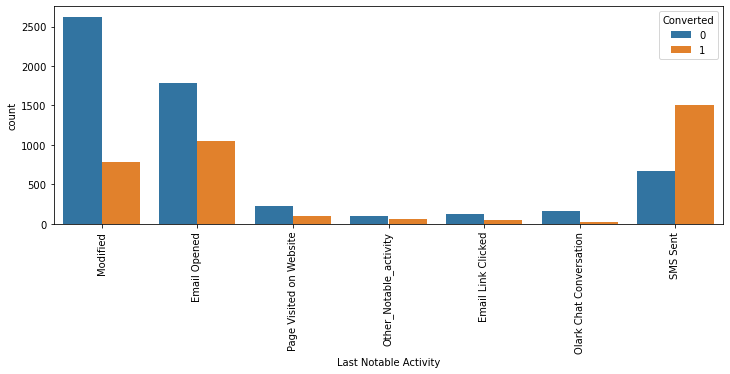

In [63]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (12,4))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [64]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Lead Profile']

In [65]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [66]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Findings: API and Landing Page Submission bring high number of leads and conversion.
    Lead Add Form has a very high conversion rate but count of leads are not very high. 
    Lead Import and Quick Add Form get very few leads.
    In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin.

## Univariate & Bivariate Analysis

In [67]:
## seggragating the numeric columns to see the outliers
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
outlier_df = leads.select_dtypes(include=num)

<Figure size 432x288 with 0 Axes>

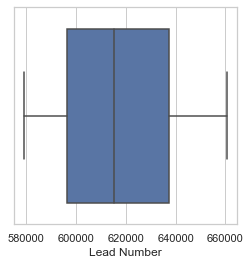

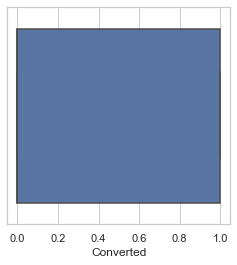

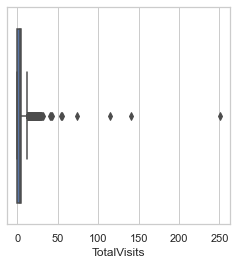

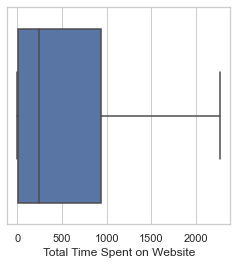

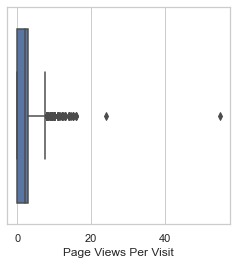

In [68]:
sns.set(style="whitegrid")

plt1 = plt.figure()
for cols,values in outlier_df.iteritems():
    plt1.suptitle(cols, fontsize=25)
    plt1, ax = plt.subplots(1,1,figsize=(4,4))
    outlier_plot = sns.boxplot(outlier_df[cols])
    plt.show()

#### Total Visits and Pages Views per visit have outliers

In [70]:
leads[['Lead Number','Converted','TotalVisits', 'Total Time Spent on Website' , 'Page Views Per Visit']].describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9240.0,3.394156,4.836682,0.0,0.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9240.0,2.327787,2.164258,0.0,0.0,2.0,3.00,55.0


In [71]:
# Removing values beyond 99% for Total Visits

quartile_total_visits = leads['TotalVisits'].quantile(0.99)
leads = leads[leads["TotalVisits"] < quartile_total_visits]
leads["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.134777
std         2.939096
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [72]:
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.134777,486.074609,2.299531
std,23413.72193,0.486718,2.939096,547.856302,2.065837
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,0.000000,10.000000,0.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [73]:
# Removing values beyond 99% for page Views Per Visit
quartile_page_visits = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads["Page Views Per Visit"] < quartile_page_visits]
leads["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.196036
std         1.843445
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [74]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads.shape

(9029, 16)

### Bivariate analysis

In [75]:
def bivariate(col):
    plt.figure(figsize=(10,8))
    s1=sns.countplot(leads[col], hue=leads.Converted)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

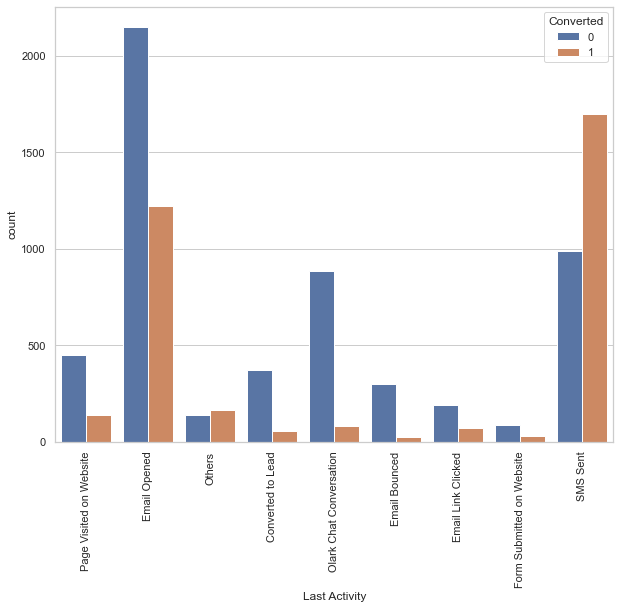

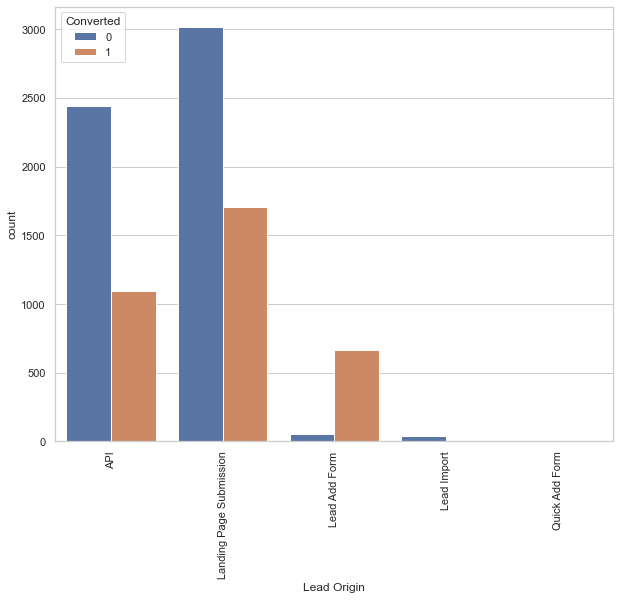

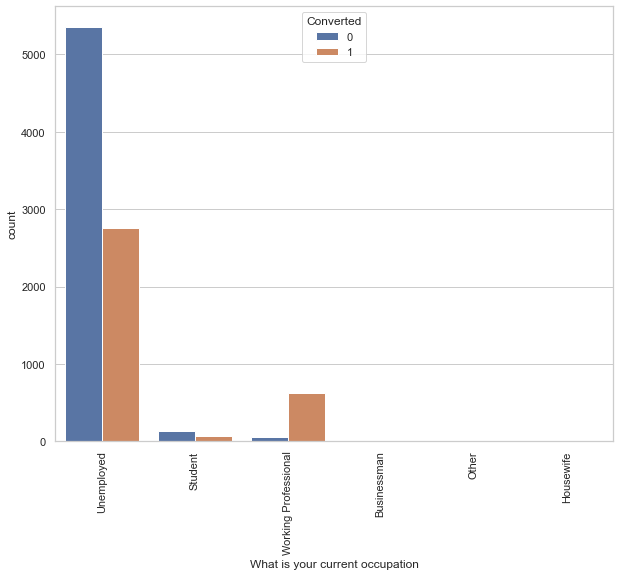

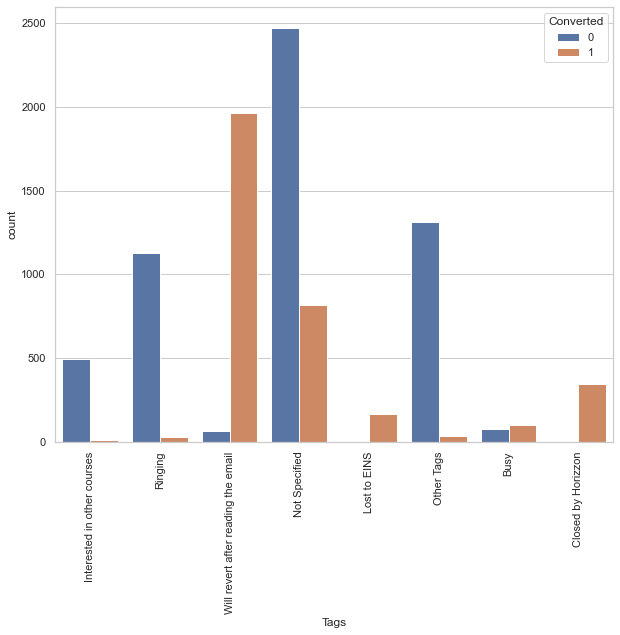

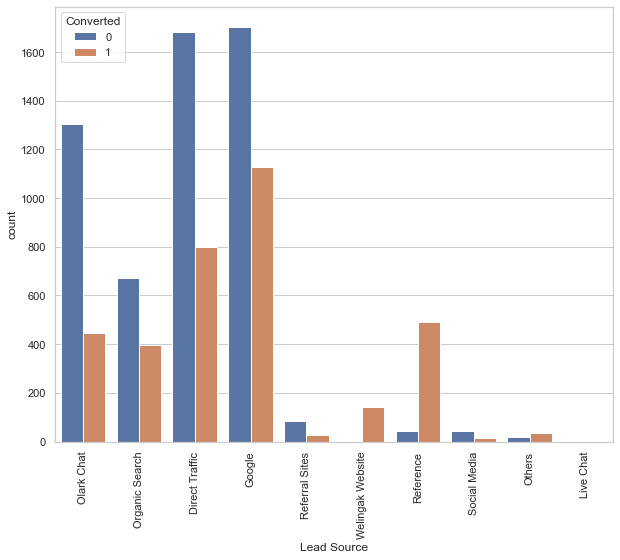

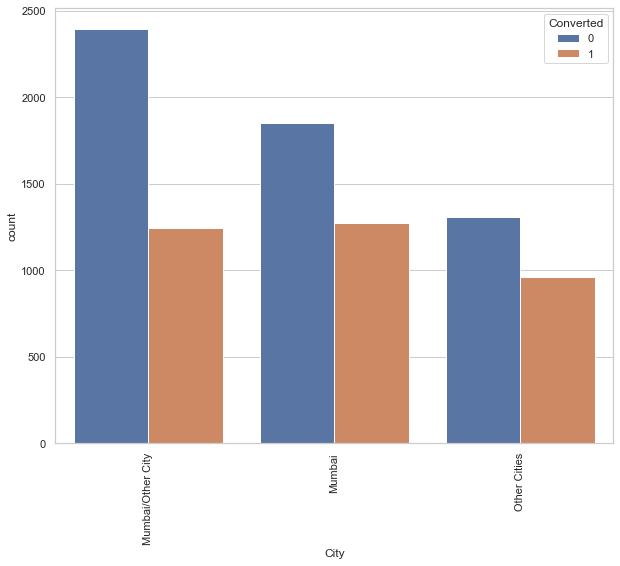

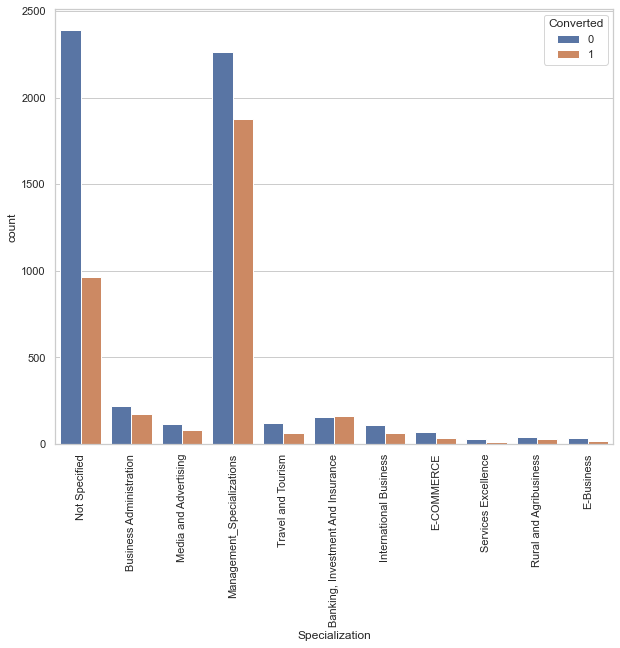

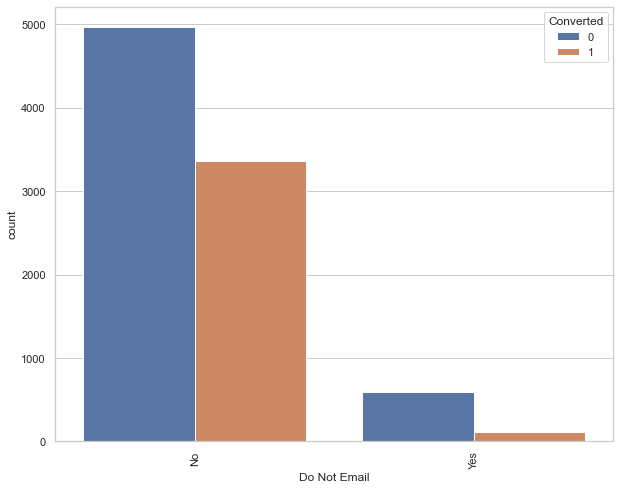

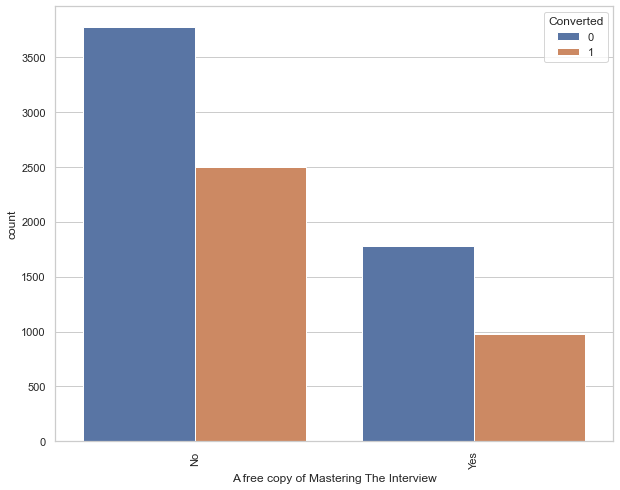

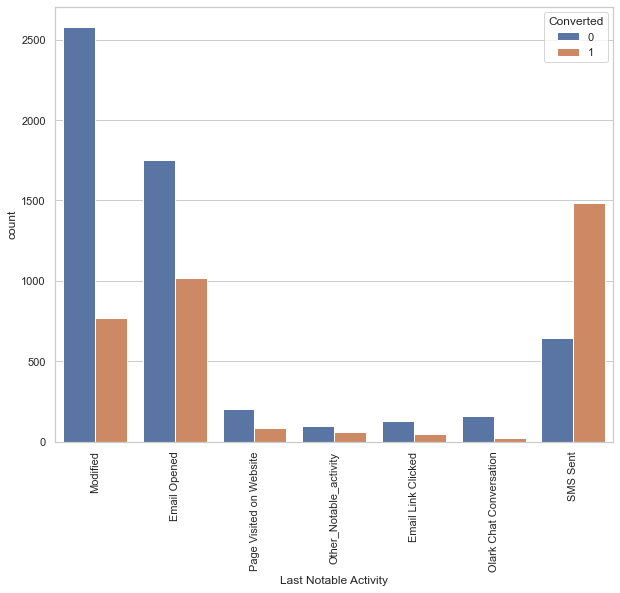

In [76]:
bivariate('Last Activity')
bivariate('Lead Origin')
bivariate('What is your current occupation')
bivariate('Tags')
bivariate('Lead Source')
bivariate('City')
bivariate('Specialization')
bivariate('Do Not Email')
bivariate('A free copy of Mastering The Interview')
bivariate('Last Notable Activity')

`TAGS who will revert after reading email have better chance of getting converted into sucessful lead,
Those who said yes to receiving email have higher chance of getting converted into lead as well as highest chance of rejecting.
Unemployed people have good conversion ratio.
Management specialisations have good conversion ratio,
SmS sent have higher conversion ratio.
Mumbai residents have`

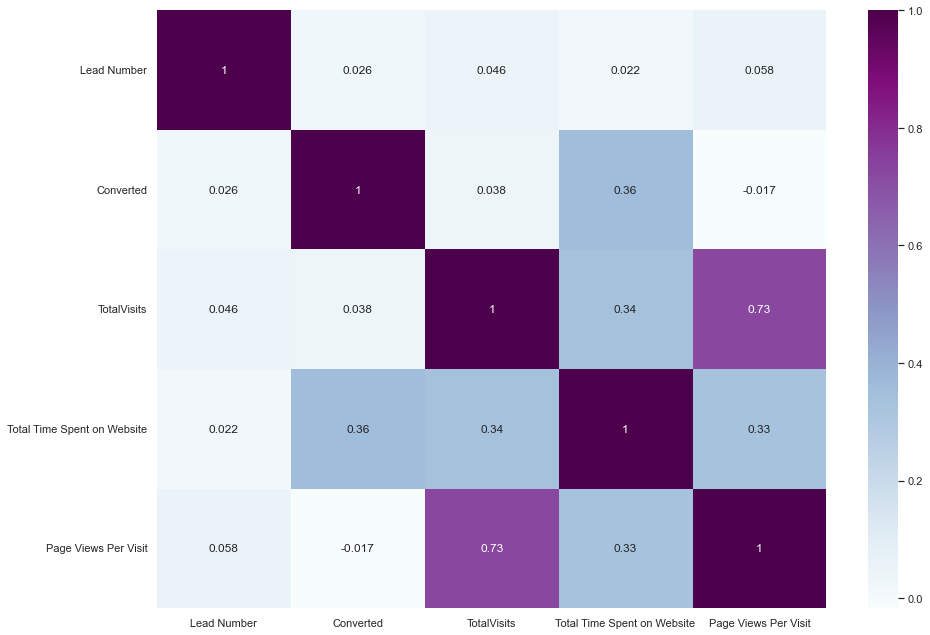

In [77]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(15,11))

# heatmap
sns.heatmap(leads.corr(), cmap="BuPu", annot=True)
plt.show()

`Total visits have strong correlation with Page Views Per Visit`

In [78]:
# Outliers
df1=leads.select_dtypes(include=['float64', 'int64']).columns
df1

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

<Figure size 1440x2520 with 0 Axes>

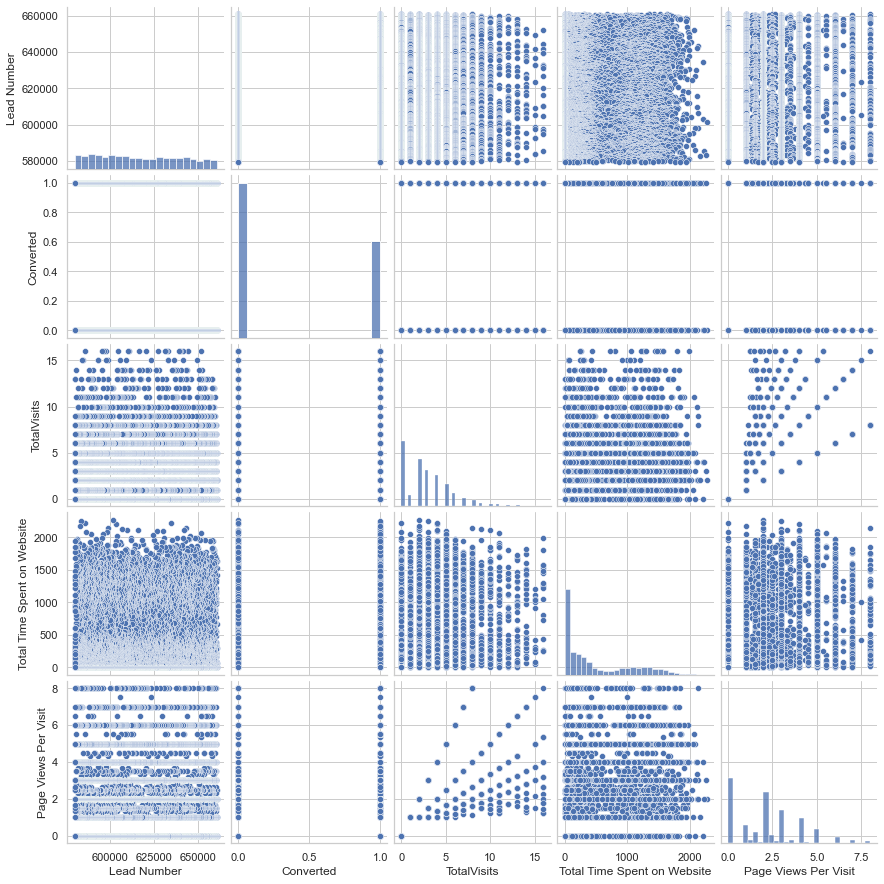

In [79]:
# Drawing Pair plots
plt.figure(figsize = (20,35))
sns.pairplot(data=leads, vars=df1)
plt.show()

`Total visits and page views per visit have linear fashion`

In [80]:
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [81]:
# Determine the percentage of data retained

num_data = round(100*(len(leads)/9240),2)
print(num_data)

97.72


### Modifying the datatypes of the columns

In [82]:
#Check the float type columns
leads.select_dtypes(include='float64').columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

In [83]:
#Converting these count columns to int64
ColumnToConvert = ['TotalVisits', 'Page Views Per Visit' ]
leads.loc[:,ColumnToConvert]=leads.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

In [84]:
#Check the object type columns
ColumnToConvert = list(leads.select_dtypes(include='object').columns)
leads.loc[:,ColumnToConvert]=leads.loc[:,ColumnToConvert].apply(lambda col: col.astype('str',errors='ignore'))

In [85]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai/Other City,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5,674,2,Email Opened,Not Specified,Unemployed,Ringing,Mumbai/Other City,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


## Check Imbalance in Target Variable

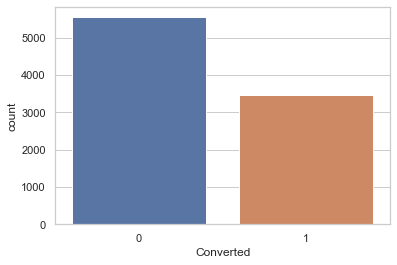

In [86]:
Target_count= sns.countplot("Converted",data =leads)

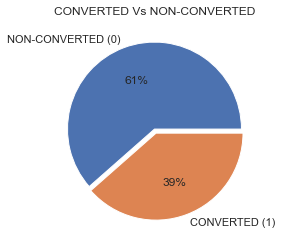

In [87]:
plt.pie(leads['Converted'].value_counts(normalize=True)*100,labels=['NON-CONVERTED (0)','CONVERTED (1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('CONVERTED Vs NON-CONVERTED')
plt.show()

In [88]:
leads['Converted'].value_counts(normalize=True)*100

0    61.490752
1    38.509248
Name: Converted, dtype: float64

#### From all the three steps we can clearly see that there is no imbalance in the target variable.

In [89]:
#getting a list of categorical columns

categorical= leads.select_dtypes(include=['object']).columns
categorical

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [90]:
# list down the variables to be mapped
variables =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[variables] = leads[variables].apply(binary_map)

In [91]:
# getting all dummy variables
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization',drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source' ,drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity',drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity', drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags',drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

In [92]:
leads.drop(categorical,1,inplace = True)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
0,660737,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,5,674,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,660727,1,2,1532,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,660719,0,1,305,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,660681,1,2,1428,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
#train test split

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6320 entries, 5493 to 5760
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Number                                           6320 non-null   int64
 1   TotalVisits                                           6320 non-null   int32
 2   Total Time Spent on Website                           6320 non-null   int64
 3   Page Views Per Visit                                  6320 non-null   int32
 4   Lead Origin_Landing Page Submission                   6320 non-null   uint8
 5   Lead Origin_Lead Add Form                             6320 non-null   uint8
 6   Lead Origin_Lead Import                               6320 non-null   uint8
 7   Lead Origin_Quick Add Form                            6320 non-null   uint8
 8   What is your current occupation_Housewife             6320 non-null   uint8

## Building the Model

In [96]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numeric] = scaler.fit_transform(X_train[numeric])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
5493,-0.413373,2,-0.708153,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8064,-1.262136,3,-0.711823,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4716,-0.119375,3,-0.471434,3,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9117,-1.590400,0,-0.884316,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2402,0.832272,6,0.704822,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
# model building using Stats Model & RFE
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,step = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [98]:
rfe.support_

array([False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 3),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 3),
 ('What is your current occupation_Housewife', False, 2),
 ('What is your current occupation_Other', False, 3),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Unemployed', False, 3),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Mumbai/Other City', False, 3),
 ('City_Other Cities', False, 3),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', False, 2),
 ('Specialization_International Business', False, 3),
 ('Specialization_Management_Specializations', False, 3),
 ('Specialization_Media and Advertising', False, 2),
 ('Specialization_

In [100]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_E-Business', 'Specialization_Not Specified',
       'Specialization_Travel and Tourism', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dt

In [101]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Mumbai/Other City',
       'City_Other Cities', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Opened'

In [102]:
#Function to build a model using statsmodel api
def build_model(cols):
    build_model.X_train_sm = sm.add_constant(X_train[cols])
    logm1 = sm.GLM(y_train,build_model.X_train_sm, family = sm.families.Binomial())
    build_model.res = logm1.fit() 
    print(build_model.res.summary())
    return build_model.res

In [103]:
#Function to calculate VIFs and print them
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [104]:
#Model 1
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1210.8
Date:                Tue, 24 Jan 2023   Deviance:                       2421.5
Time:                        16:34:32   Pearson chi2:                 8.72e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6119
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [105]:
#removing Lead Source_Others based on p value
cols=cols.drop('Lead Source_Others')

In [106]:
# Model 2
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1210.9
Date:                Tue, 24 Jan 2023   Deviance:                       2421.8
Time:                        16:34:33   Pearson chi2:                 8.71e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6119
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [107]:
#removing Lead Specialization_E-Business based on p value
cols=cols.drop('Specialization_E-Business')

In [108]:
# Model 3
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1211.1
Date:                Tue, 24 Jan 2023   Deviance:                       2422.3
Time:                        16:34:33   Pearson chi2:                 8.72e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6118
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [109]:
#removing Specialization_Travel and Tourism based on p value
cols=cols.drop('Specialization_Travel and Tourism')

In [110]:
# Model 4
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1211.8
Date:                Tue, 24 Jan 2023   Deviance:                       2423.6
Time:                        16:34:34   Pearson chi2:                 8.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6117
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [111]:
#removing Last Notable Activity_Olark Chat Conversation based on p value
cols=cols.drop('Last Notable Activity_Olark Chat Conversation')

In [112]:
# Model 5
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1212.6
Date:                Tue, 24 Jan 2023   Deviance:                       2425.2
Time:                        16:34:34   Pearson chi2:                 8.68e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6116
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [113]:
#removing Last Activity_Form Submitted on Website based on p value
cols=cols.drop('Last Activity_Form Submitted on Website')

In [114]:
# Model 6
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1213.7
Date:                Tue, 24 Jan 2023   Deviance:                       2427.4
Time:                        16:34:34   Pearson chi2:                 8.49e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6115
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [115]:
#removing What is your current occupation_Working Professional based on p value
cols=cols.drop('What is your current occupation_Working Professional')

In [116]:
# Model 7
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1215.5
Date:                Tue, 24 Jan 2023   Deviance:                       2431.0
Time:                        16:34:35   Pearson chi2:                 8.59e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6113
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [117]:
#removing Lead Origin_Lead Add Form based on VIF
cols=cols.drop('Lead Origin_Lead Add Form')

In [118]:
# Model 8
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1221.0
Date:                Tue, 24 Jan 2023   Deviance:                       2442.0
Time:                        16:34:35   Pearson chi2:                 8.41e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6106
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [119]:
#removing Last Notable Activity_SMS Sent based on VIF
cols=cols.drop('Last Notable Activity_SMS Sent')

In [120]:
# Model 9
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1235.0
Date:                Tue, 24 Jan 2023   Deviance:                       2470.1
Time:                        16:34:35   Pearson chi2:                 8.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6089
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [121]:
#removing Last Activity_Email Bounced based on p value
cols=cols.drop('Last Activity_Email Bounced')

In [122]:
# Model 10
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1236.4
Date:                Tue, 24 Jan 2023   Deviance:                       2472.8
Time:                        16:34:36   Pearson chi2:                 8.74e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6087
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [123]:
#removing Last Notable Activity_Other_Notable_activity based on p value
cols=cols.drop('Last Notable Activity_Other_Notable_activity')

In [124]:
# Model 11
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.1
Date:                Tue, 24 Jan 2023   Deviance:                       2474.2
Time:                        16:34:36   Pearson chi2:                 8.66e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6086
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [125]:
#removing Lead Source_Reference Bounced based on p value
cols=cols.drop('Lead Source_Reference')

In [126]:
# Model 12
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.6
Date:                Tue, 24 Jan 2023   Deviance:                       2477.1
Time:                        16:34:36   Pearson chi2:                 8.92e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6084
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [127]:
#removing Last Activity_Email Opened based on p value
cols=cols.drop('Last Activity_Email Opened')

In [128]:
# Model 13
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.0
Date:                Tue, 24 Jan 2023   Deviance:                       2480.0
Time:                        16:34:37   Pearson chi2:                 8.74e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6083
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Here pvalue is well maintained and vif is also below threshold so model building is done`

In [129]:
y_train_pred = build_model.res.predict(build_model.X_train_sm)
y_train_pred[:10]

5493    0.000721
8064    0.001486
4716    0.114073
9117    0.025558
2402    0.967866
1796    0.022639
1120    0.022639
253     0.074131
1491    0.102377
2004    0.981024
dtype: float64

In [130]:
y_train_pred = y_train_pred.values.reshape(-1) #to convert into 1D array
y_train_pred[:10]

array([7.21046528e-04, 1.48619385e-03, 1.14072873e-01, 2.55579477e-02,
       9.67865729e-01, 2.26385206e-02, 2.26385206e-02, 7.41307776e-02,
       1.02376805e-01, 9.81024340e-01])

In [131]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred}) #converted probability and  final output
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.000721,5493
1,0,0.001486,8064
2,0,0.114073,4716
3,0,0.025558,9117
4,1,0.967866,2402


In [132]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)  

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.000721,5493,0
1,0,0.001486,8064,0
2,0,0.114073,4716,0
3,0,0.025558,9117,0
4,1,0.967866,2402,1


In [133]:
from sklearn import metrics

# Confusion matrix 
cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(cm)


[[3736  173]
 [ 296 2115]]


Confusion matrix namely TP, TN, FP, FN

In [134]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)) 

0.9257911392405064


##### We have a 92.6 % accuracy which is great.

In [135]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] #false negative

In [136]:
print('Recal: ' ,TP / float(TP+FN))
print('Specificity: ',TN / float(TN+FP))
print('Fallout rate: ' ,FP/ float(TN+FP))
print ('Positive Predicted Value: ' ,TP / float(TP+FP))
print ('Negative Predicted Value: ',TN / float(TN+ FN))

Recal:  0.8772293654085441
Specificity:  0.9557431568176004
Fallout rate:  0.04425684318239959
Positive Predicted Value:  0.9243881118881119
Negative Predicted Value:  0.9265873015873016


In [137]:
def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve ')
    plt.legend(loc="lower right")
    plt.show()

    return None

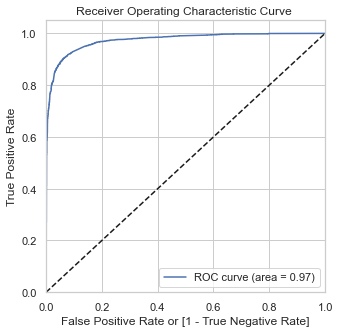

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [139]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000721,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.001486,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.114073,4716,0,1,1,0,0,0,0,0,0,0,0
3,0,0.025558,9117,0,1,0,0,0,0,0,0,0,0,0
4,1,0.967866,2402,1,1,1,1,1,1,1,1,1,1,1


In [140]:
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

n = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in n:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.838291  0.974285  0.754413
0.2   0.2  0.892722  0.951472  0.856485
0.3   0.3  0.920095  0.913729  0.924021
0.4   0.4  0.924842  0.895894  0.942696
0.5   0.5  0.925791  0.877229  0.955743
0.6   0.6  0.924051  0.857321  0.965208
0.7   0.7  0.913291  0.807964  0.978255
0.8   0.8  0.903797  0.775612  0.982860
0.9   0.9  0.885601  0.716715  0.989767


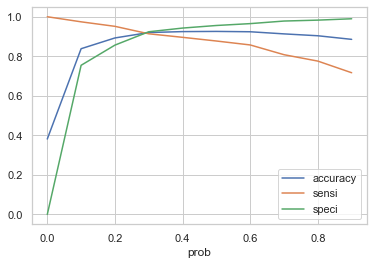

In [141]:
cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### As we can see 0.3 looks like a good option via both the plot and the range

In [142]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.000721,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.001486,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.114073,4716,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.025558,9117,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.967866,2402,1,1,1,1,1,1,1,1,1,1,1,1


In [143]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.000721,5493,0,0
1,0,0.001486,8064,0,0
2,0,0.114073,4716,0,11
3,0,0.025558,9117,0,3
4,1,0.967866,2402,1,97


`Lead Score`

In [144]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9200949367088608

In [145]:
cm2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
cm2

array([[3612,  297],
       [ 208, 2203]], dtype=int64)

In [146]:
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] #false negative

In [147]:
print('Sensitivity: ',TP / float(TP+FN))
print('Selectivity: ',TN / float(TN+FP))
print ('Positive Predictive Value: ',TP / float(TP+FP))
print ('Negative Predictive Value: ',TN / float(TN+ FN))

Sensitivity:  0.913728743260058
Selectivity:  0.9240214888718342
Positive Predictive Value:  0.8812
Negative Predictive Value:  0.9455497382198953


In [148]:
print(FP/ float(TN+FP))
# Calculate False Postive Rate - predicting conversion when customer does not have convert

0.07597851112816577


In [149]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3612,  297],
       [ 208, 2203]], dtype=int64)

In [150]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8812

In [151]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.913728743260058

In [152]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8812

precision score is 88

In [153]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.913728743260058

recall score is 91

In [154]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

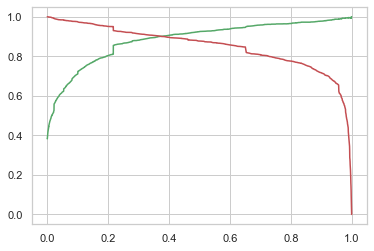

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

`Now we will scale on test set`

In [156]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
4664,-0.102048,0,-0.884316,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5394,-0.382986,4,-0.583371,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1595,1.135537,4,1.264507,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2111,0.948389,7,0.073571,7,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9182,-1.608977,0,-0.884316,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [157]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Specialization_Not Specified,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
4664,-0.884316,0,1,1,0,0,0,0,0,0,0,1,0,0,0
5394,-0.583371,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1595,1.264507,1,0,0,0,0,0,1,1,0,0,0,0,0,0
2111,0.073571,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9182,-0.884316,0,1,1,0,0,1,1,0,0,0,0,1,0,0


In [158]:
X_test_sm = sm.add_constant(X_test)

In [159]:
y_test_pred = build_model.res.predict(X_test_sm)
y_test_pred[:10]

4664    0.217327
5394    0.118256
1595    0.995450
2111    0.137164
9182    0.029176
1055    0.401195
541     0.206913
446     0.968960
3728    0.013469
4249    0.013112
dtype: float64

In [160]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4664,0.217327
5394,0.118256
1595,0.995450
2111,0.137164
9182,0.029176


In [161]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4664,0.217327
1,0,5394,0.118256
2,1,1595,0.995450
3,0,2111,0.137164
4,0,9182,0.029176


In [164]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,4664,0.217327
1,0,5394,0.118256
2,1,1595,0.995450
3,0,2111,0.137164
4,0,9182,0.029176


In [165]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [166]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4664,0,0.217327,22
1,5394,0,0.118256,12
2,1595,1,0.995450,100
3,2111,0,0.137164,14
4,9182,0,0.029176,3


In [167]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4664,0,0.217327,22,0
1,5394,0,0.118256,12,0
2,1595,1,0.995450,100,1
3,2111,0,0.137164,14,0
4,9182,0,0.029176,3,0


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9276485788113695

In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1530,  113],
       [  83,  983]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
print('Sensitivity: ',TP / float(TP+FN))
print('Specificity: ',TN / float(TN+FP))

Sensitivity:  0.9221388367729831
Specificity:  0.931223371880706


In [172]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8968978102189781

Precision Score 89

In [173]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9221388367729831

Recall Score 92

In [174]:
y_pred_final=y_pred_final.rename(columns={'Lead_Score':'Score'})
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Score,final_Predicted
0,4664,0,0.217327,22,0
1,5394,0,0.118256,12,0
2,1595,1,0.995450,100,1
3,2111,0,0.137164,14,0
4,9182,0,0.029176,3,0


`Tags_Closed by Horizzon
Tags_Lost to EINS
Lead Source_Welingak Website`

`These are the top factors which can help in generating more successful leads`